Informasi data https://www.kaggle.com/datasets/shikhnu/gold-price

BUSINESS UNDERSTANDING

Pada tahap ini dimulai dengan tujuan dan kebutuhan proyek. permasalahannya ialah harga emas dapat naik turun maupun tetap setiap hari. Oleh karena itu proyek ini membuat estimasi harga emas untuk mendapatkan informasi naik atau turunnya harga setiap hari, maupun untuk dapat keuntungan bagi pembeli atau penjual

    Date : Tanggal Perhari Harga Emas
    Open : Harga Pembukaan Emas Setiap hari
    High : Harga Emas Tertinggi
    Low : Harga Emas Terendah
    Chg : Presentase Perubahan Harga
    



# Deskripsi library yang digunakan

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Memanggi Dataset

In [ ]:
df = pd.read_csv('GoldPrice.csv')

# Deskripsi Dataset

In [ ]:
df.head()

,Date,Price,Open,High,Low,Chg%
Sep 11,2020,1957.35,1952.55,1963.3,1944.35,-0.0035
Sep 10,2020,1964.30,1955.30,1975.2,1948.60,0.0048
Sep 09,2020,1954.90,1939.40,1959.7,1926.30,0.0060
Sep 08,2020,1943.20,1938.00,1948.3,1911.70,0.0031
Sep 07,2020,1937.10,1940.70,1947.4,1930.45,-0.0018


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2531 entries, Sep 11 to Jan 03
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    2531 non-null   int64  
 1   Price   2531 non-null   float64
 2   Open    2531 non-null   float64
 3   High    2531 non-null   float64
 4   Low     2531 non-null   float64
 5   Chg%    2531 non-null   float64
dtypes: float64(5), int64(1)
memory usage: 138.4+ KB


<Axes: >

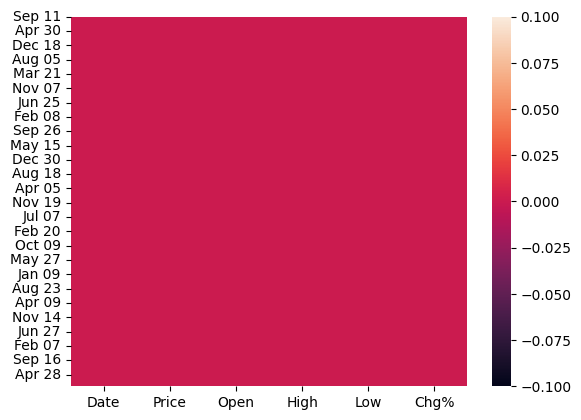

In [ ]:
sns.heatmap(df.isnull())

In [ ]:
df.describe()

,Date,Price,Open,High,Low,Chg%
count,2531.000000,2531.000000,2531.000000,2531.000000,2531.000000,2531.000000
mean,2015.411695,1428.516148,1421.804058,1426.688119,1416.290885,0.000254
std,2.795325,179.401005,183.482977,187.313509,179.204684,0.016016
min,2011.000000,1070.800000,1070.100000,1074.200000,1069.200000,-0.111300
25%,2013.000000,1300.200000,1291.350000,1293.885000,1288.300000,-0.004700
50%,2015.000000,1370.300000,1360.500000,1362.300000,1359.300000,0.000100
75%,2018.000000,1551.200000,1552.000000,1561.350000,1541.150000,0.005300
max,2020.000000,2069.400000,2076.400000,2089.200000,2049.000000,0.127100


# Visualisasi Data

<Axes: >

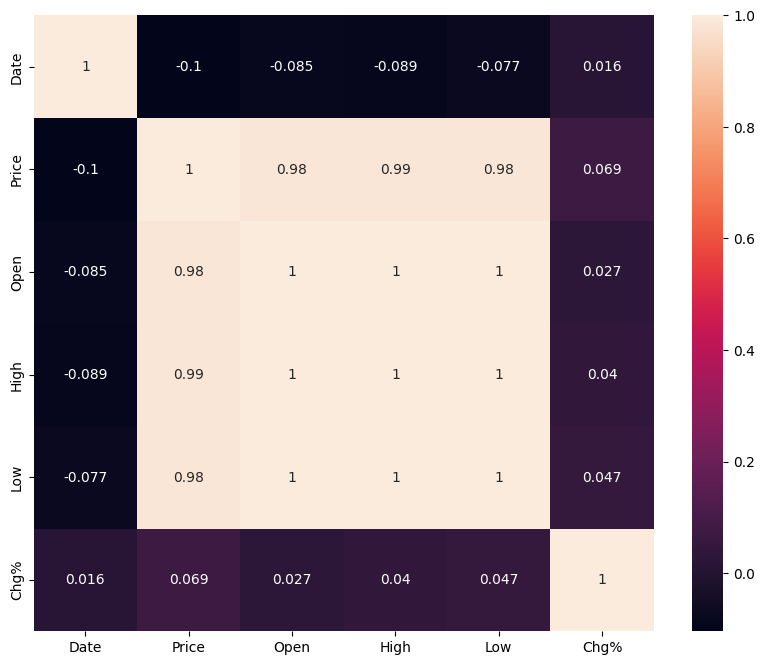

In [ ]:
plt.figure(figsize=(10,8))
sns.heatmap(df.corr(),annot=True)

#  Kenaikan Harga Emas Berdasarkan Date

In [ ]:
models = df.groupby('Date').count()[['High']].sort_values(by='High',ascending=True).reset_index()
models = models.rename(columns={'High':'numberOfgoldprice'})

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 [Text(0, 0, '2011'),
  Text(1, 0, '2012'),
  Text(2, 0, '2013'),
  Text(3, 0, '2014'),
  Text(4, 0, '2015'),
  Text(5, 0, '2016'),
  Text(6, 0, '2017'),
  Text(7, 0, '2018'),
  Text(8, 0, '2019'),
  Text(9, 0, '2020')])

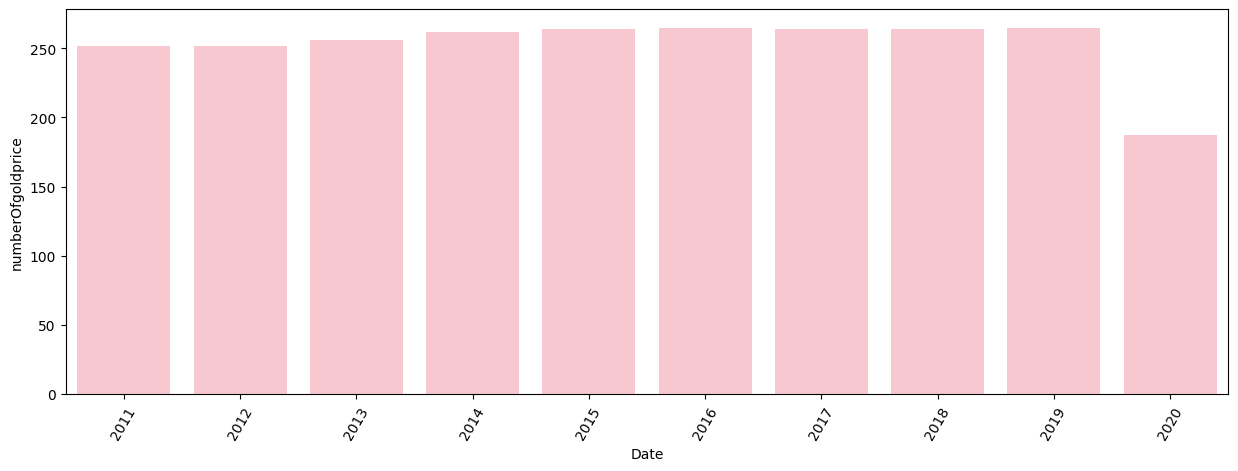

In [ ]:
fig = plt.figure(figsize=(15,5))
sns.barplot(x=models['Date'], y=models['numberOfgoldprice'], color='pink')
plt.xticks(rotation=60)

#

# 

In [ ]:
engine = df.groupby('Date').count()[['Open']].sort_values(by='Open').reset_index()
engine = engine.rename(columns={'Open':'count'})

<Axes: xlabel='Date', ylabel='count'>

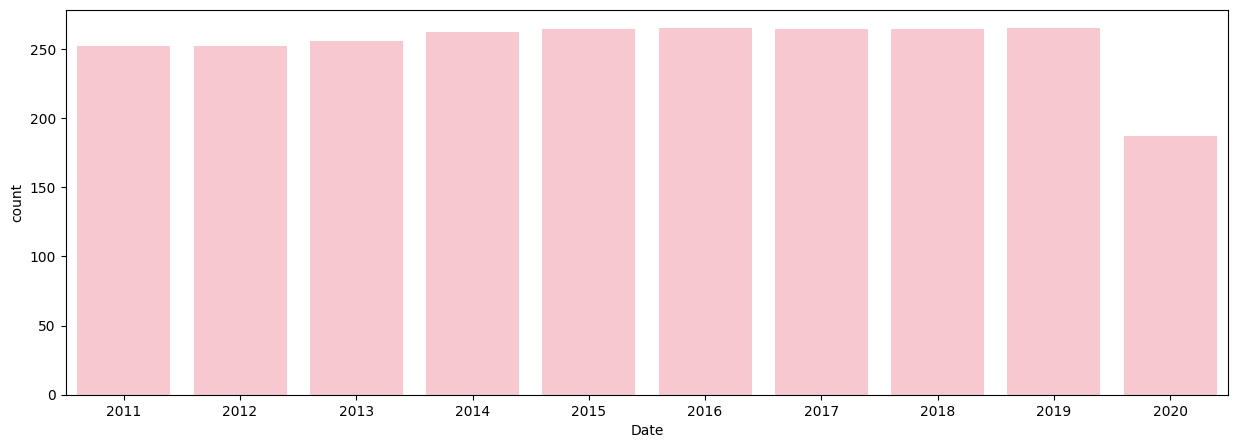

In [ ]:
plt.figure(figsize=(15,5))
sns.barplot(x=engine['Date'], y=engine['count'], color='pink')

# Distribusi Open 

C:\Users\ASUS\AppData\Local\Temp\ipykernel_11136\1380803012.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Open'])


<Axes: xlabel='Open', ylabel='Density'>

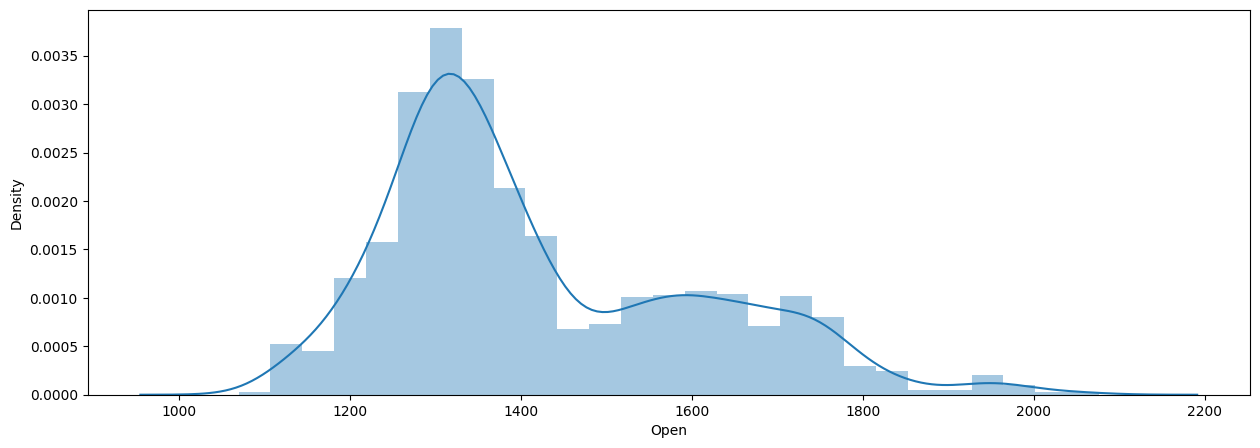

In [ ]:
plt.figure(figsize=(15,5))
sns.distplot(df['Open'])

# Distribusi Harga Emas

C:\Users\ASUS\AppData\Local\Temp\ipykernel_11136\1954555324.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Price'])


<Axes: xlabel='Price', ylabel='Density'>

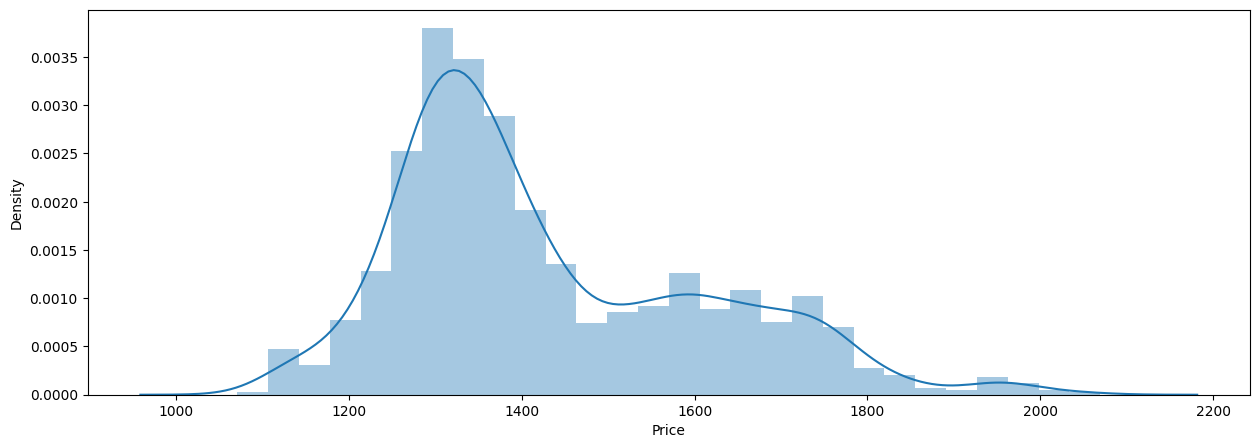

In [ ]:
plt.figure(figsize=(15,5))
sns.distplot(df['Price'])

# Seleksi Fitur

In [ ]:
features = ['Open','High','Low','Date','Chg%']
x = df[features]
y = df['Price']
x.shape, y.shape

((2531, 5), (2531,))

# Split data training dan data testing

In [ ]:
from sklearn.model_selection import train_test_split
x_train, X_test, y_train, y_test = train_test_split(x,y,random_state=70)
y_test.shape

(633,)

# Membuat Model Regresi Linier

In [ ]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(x_train,y_train)
pred = lr.predict(X_test)

In [ ]:
score = lr.score(X_test, y_test)
print('akurasi model regresi linier = ', score)

akurasi model regresi linier =  0.9762303117901406


# Membuat Inputan Model Regresi Linier

In [ ]:
#Date=10 Januari, Open=195735, High=1989.5, =196330.2, Low=19724
input_data = np.array([[10 Januari,1989.5,195735,196330.2,1972.4]])

prediction = lr.predict(input_data)
print('Estimasi harga emas dalam Rupiah :', prediction)

Estimasi harga emas dalam Rupiah : [160444.19414281]


C:\Users\ASUS\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


# Save Model

In [ ]:
import pickle

filename = 'estimasi_goldprice.sav'
pickle.dump(lr,open(filename,'wb'))